In [2]:
import pandas as pd 

QA Performance Analysis

In [22]:
df = pd.read_csv ("../qa_evaluation_results.csv")

In [23]:
qa_task_df = df.groupby(['neuron_mapping', 'metrics'])["performance"].mean().reset_index()

In [24]:
qa_task_df

,neuron_mapping,metrics,performance
0,multiple_single_middle_late,em,58.752444
1,multiple_single_middle_late,f1,70.210375
2,multiple_single_multilayer,em,58.727215
3,multiple_single_multilayer,f1,70.499135
4,no_mapping,em,56.501419
5,no_mapping,f1,68.375934
6,single_middle,em,58.742353
7,single_middle,f1,70.233672


NER Performance Analysis

In [3]:
df = pd.read_csv ("../ner_evaluation_results.csv")

In [5]:
ner_task_df = df.groupby(['neuron_mapping', 'metrics'])["performance"].mean().reset_index()

In [6]:
ner_task_df

,neuron_mapping,metrics,performance
0,multiple_single_middle_late,accuracy,0.980290
1,multiple_single_middle_late,f1,0.898166
2,multiple_single_multilayer,accuracy,0.980184
3,multiple_single_multilayer,f1,0.896748
4,no_mapping,accuracy,0.978772
5,no_mapping,f1,0.888854
6,single_middle,accuracy,0.980276
7,single_middle,f1,0.896913


GLUE Performance Analysis

In [432]:
df = pd.read_csv ("../glue_evaluation_results.csv")

In [439]:
glue_task_df = df.groupby(['neuron_mapping', 'glue_task'])["performance"].mean().reset_index()

In [440]:
glue_task_df.pivot_table('performance', ['neuron_mapping'], 'glue_task')

glue_task,cola,mnli,mnli-mm,mrpc,qnli,qqp,rte,sst2,stsb,wnli
neuron_mapping,,,,,,,,,,
multiple_single_middle_late,0.241201,0.728040,0.738463,0.779575,0.828836,0.848840,0.572879,0.873065,0.630259,0.214085
multiple_single_multilayer,0.250129,0.728540,0.737846,0.785942,0.830462,0.848469,0.553700,0.869194,0.665136,0.215023
no_mapping,0.227838,0.715497,0.727516,0.781676,0.821222,0.842703,0.554272,0.864679,0.567343,0.242254
single_middle,0.232094,0.729693,0.739768,0.787450,0.831549,0.848461,0.559807,0.865214,0.672314,0.239437


MLM Performance Analysis

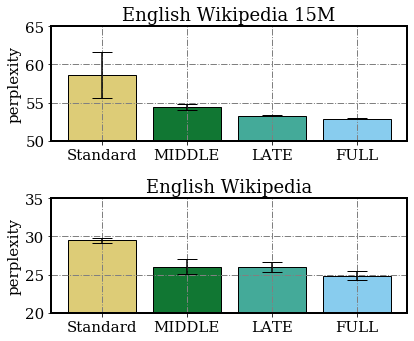

In [173]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use("ggplot")
plt.rcParams["font.family"] = "DejaVu Serif"
font = {'family' : 'DejaVu Serif',
        'size'   : 15}
plt.rc('font', **font)
with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    fig, axs = plt.subplots(2, 1, figsize=(6, 5))
    langs = ['Standard', 'MIDDLE', 'LATE', 'FULL']
    students = [58.63375, 54.4309, 53.2990, 52.88815]
    errors = [2.988840883, 0.3688976077, 0.02969848481, 0.05649783182]
    axs[0].bar(
        langs,students,color=['#ddcc77', "#117733", "#44aa99", "#88ccee"], edgecolor='black',
        yerr=errors, align='center', ecolor='black', capsize=10
    )
    axs[0].set_ylim(50,65)
    langs = ['Standard', 'MIDDLE', 'LATE', 'FULL']
    students = [29.5069, 26.0449, 25.9698, 24.84965]
    errors = [0.3184808942, 0.93, 0.626204175, 0.578201215]
    axs[1].bar(
        langs,students,color=['#ddcc77', "#117733", "#44aa99", "#88ccee"], edgecolor='black',
        yerr=errors, align='center', ecolor='black', capsize=10
    )
    axs[1].set_ylim(20,35)
    axs[0].set_ylabel("perplexity")
    axs[1].set_ylabel("perplexity")
    axs[0].set_title("English Wikipedia 15M")
    axs[1].set_title("English Wikipedia")
    fig.tight_layout()
    axs[0].spines["top"].set_linewidth(2)
    axs[0].spines["bottom"].set_linewidth(2)
    axs[0].spines["left"].set_linewidth(2)
    axs[0].spines["right"].set_linewidth(2)
    axs[1].spines["top"].set_linewidth(2)
    axs[1].spines["bottom"].set_linewidth(2)
    axs[1].spines["left"].set_linewidth(2)
    axs[1].spines["right"].set_linewidth(2)
    axs[0].xaxis.grid(color='grey', linestyle='-.', linewidth=1)
    axs[0].yaxis.grid(color='grey', linestyle='-.', linewidth=1)
    axs[1].xaxis.grid(color='grey', linestyle='-.', linewidth=1)
    axs[1].yaxis.grid(color='grey', linestyle='-.', linewidth=1)
    plt.savefig("../paper_figures/ppl_last.png", dpi=1000, bbox_inches='tight')